In [19]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [20]:
train_df: pd.DataFrame = pd.read_pickle('train_df_20241121_223002.pkl')
val_df: pd.DataFrame = pd.read_pickle('val_df_20241121_223002.pkl')
test_df: pd.DataFrame = pd.read_pickle('test_df_20241121_223002.pkl')

df = pd.concat([train_df, val_df, test_df])

print(df.select_dtypes(include=['object']).columns)

x = df.drop(columns=['ConvertedCompYearly', 'MainBranch', 'RemoteWork', 'DevType', 'Country', 'AISelect'])
y = df['ConvertedCompYearly']

Index(['MainBranch', 'RemoteWork', 'DevType', 'Country', 'AISelect'], dtype='object')


In [21]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

Fold 1 - RMSE: 153149.9476, R²: 0.1539


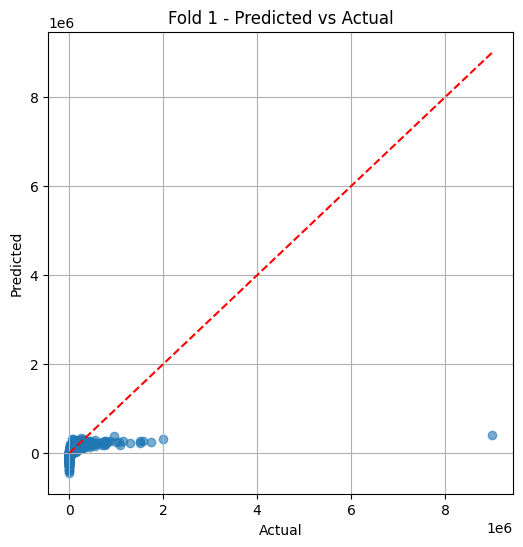

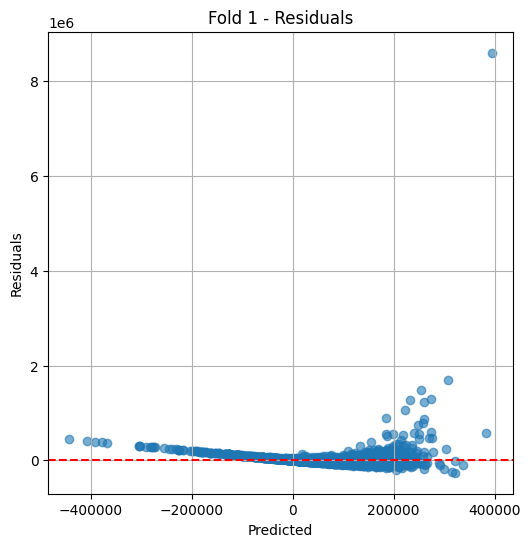

Fold 2 - RMSE: 104565.1709, R²: 0.2149


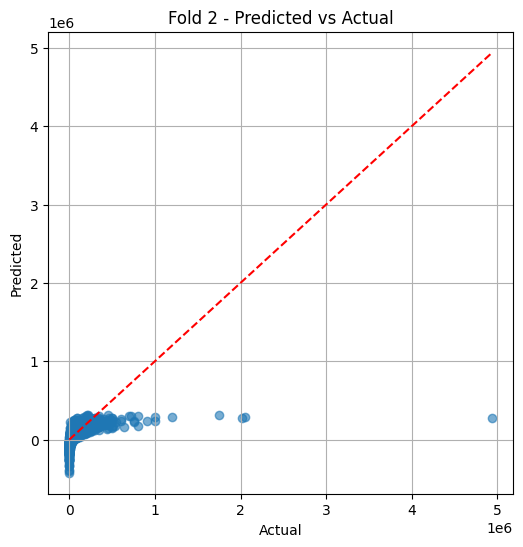

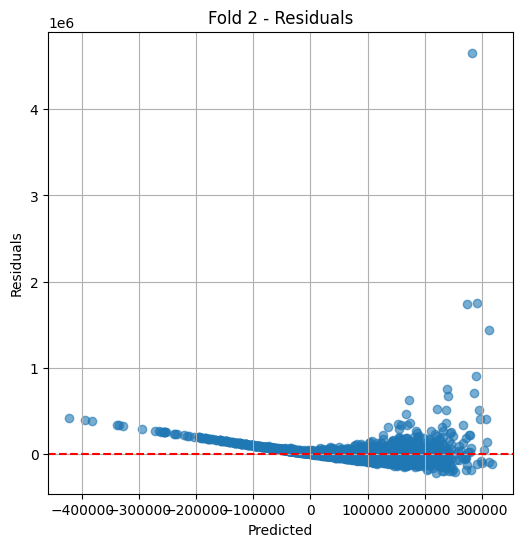

Fold 3 - RMSE: 212855.1845, R²: 0.1123


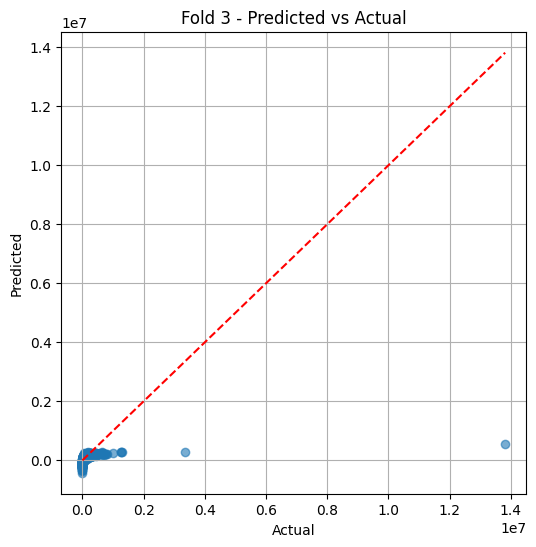

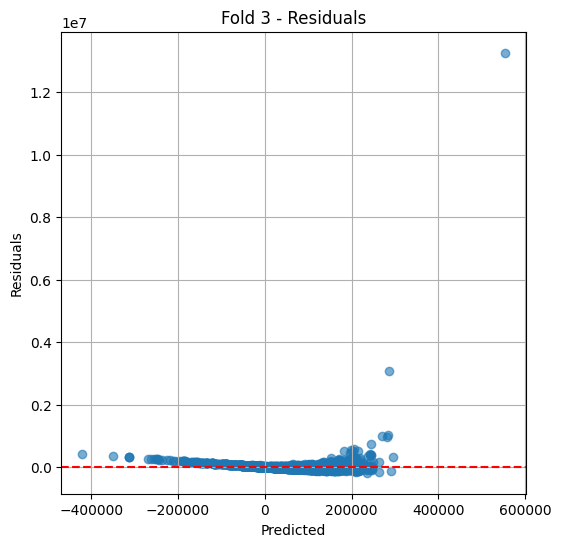

Fold 4 - RMSE: 247833.6397, R²: 0.0841


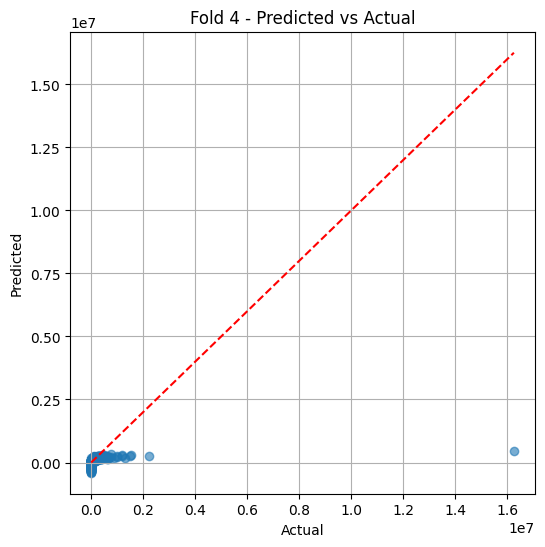

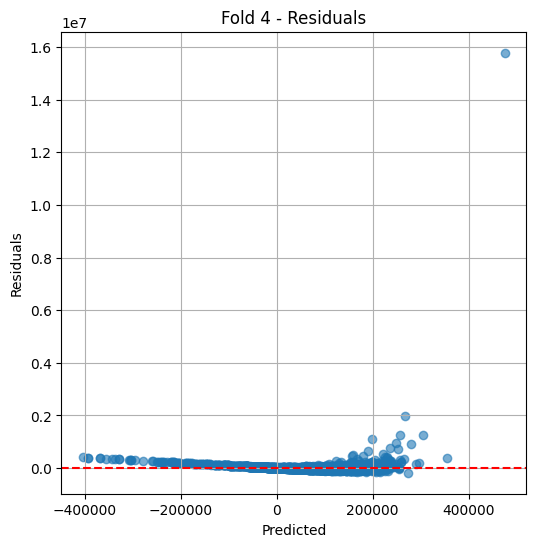

Fold 5 - RMSE: 129730.4740, R²: 0.1689


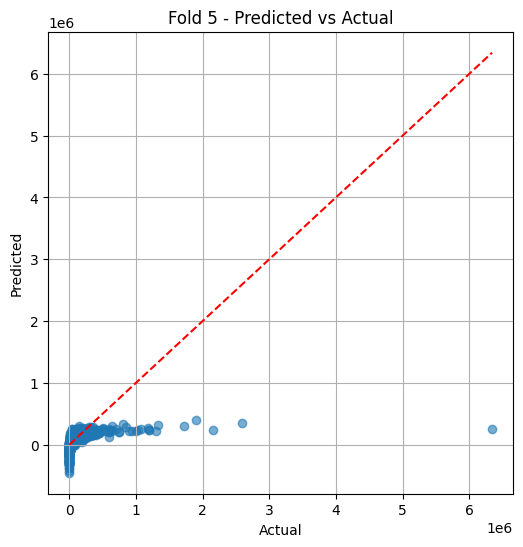

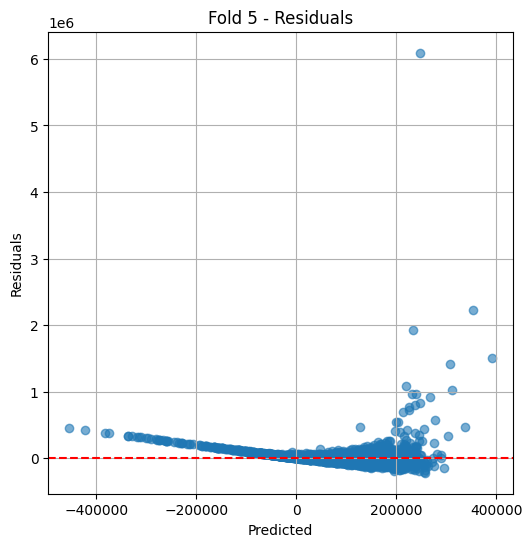

In [ ]:
for fold, (train_index, test_index) in enumerate(k_fold.split(x)):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    pca = PCA(n_components=0.9) 
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_pca, y_train)
    
    y_pred = model.predict(X_test_pca)

    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Fold {fold + 1} - RMSE: {rmse:.4f}, R²: {r2:.4f}")

    # 1. Predicted vs Actual Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
    plt.title(f"Fold {fold + 1} - Predicted vs Actual")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.show()

    # 2. Residual Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 6))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(0, color="red", linestyle="--")
    plt.title(f"Fold {fold + 1} - Residuals")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker="o")
    plt.title("Cumulative Explained Variance by PCA Components")
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.grid(True)
    plt.show()

